# Run programme using CPU and GPU 

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.test.is_built_with_cuda()

True

## import datasets

In [8]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 173s 1us/step


(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

## Data Visualization

In [12]:
def plot_sample(index):
    plt.figure(figsize= (10,1))
    plt.imshow(x_train[index])

classes = ["airplane","automobile","bird","cat",'deer',"dog","frog","horse","ship","truck" ]

'frog'

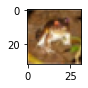

In [14]:
plot_sample(0)
classes[y_train[0][0]]

'deer'

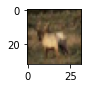

In [15]:
plot_sample(3)
classes[y_train[3][0]]

## Scaling of datasets

In [18]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [19]:
# one-hot-encoding of y_train and y_test datasets
y_train_coded = keras.utils.to_categorical(
    y_train, num_classes=10 , dtype='float32'
)
y_test_coded = keras.utils.to_categorical(
    y_test, num_classes=10 , dtype='float32'
)

y_train_coded[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

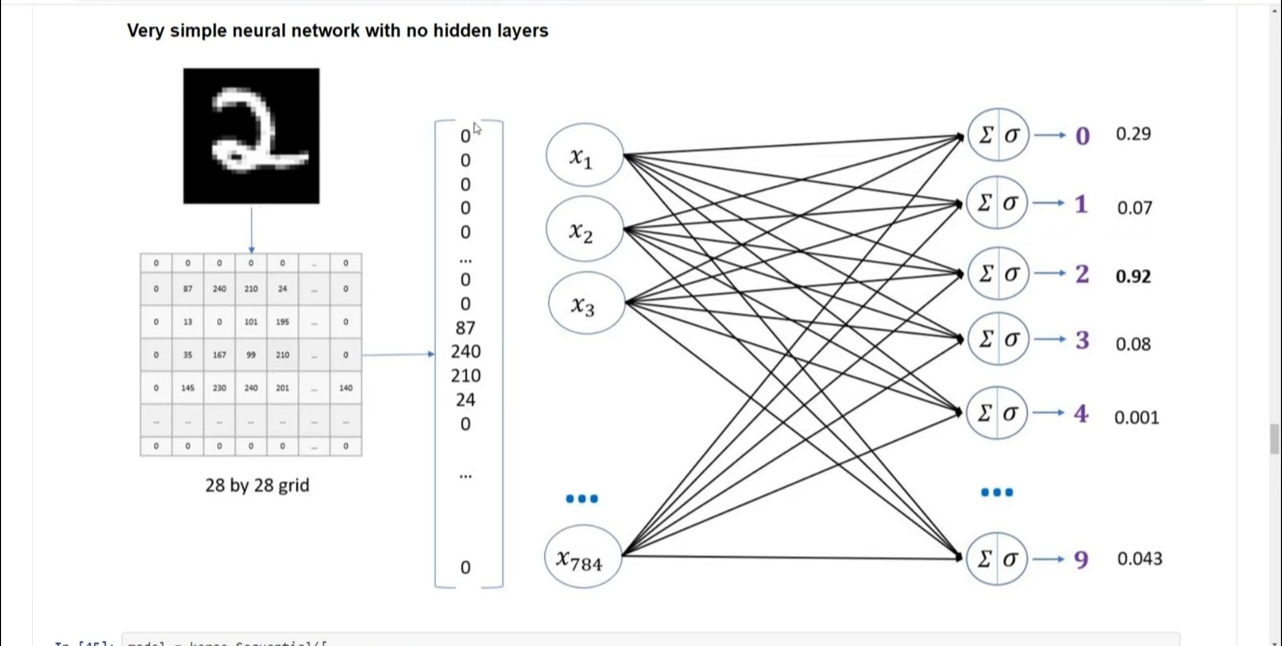

In [22]:
from IPython.display import Image
Image(filename='D:\Akash\Machine Learning\Data_for_ML\\NN-for-image.jpeg')

## model building and training

In [34]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [35]:
model_1 = get_model()
model_1.fit(x_train_scaled, y_train_coded, epochs=1)

1563/1563 [==============================] - 199s 125ms/step - loss: 1.8525 - accuracy: 0.3397


## Let's make some predictions

In [36]:
np.argmax(model_1.predict(x_test_scaled)[5])

6

In [37]:
y_test[5]

array([6], dtype=uint8)

# Measure training time on a CPU

In [41]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_coded, epochs=1)

1563/1563 [==============================] - 231s 146ms/step - loss: 1.8517 - accuracy: 0.3419
3min 56s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


** very slow hay apna cpu bhai !!!!**

# Lets measure training time on a GPU

In [44]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_coded, epochs=1)

1563/1563 [==============================] - 199s 125ms/step - loss: 1.8504 - accuracy: 0.3424
3min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
